### Linear Regression Implementation from Scratch

Modern deep learning frameworks can automate nearly all of this work, **BUT** implementing things from scratch is the only way to make sure that you really know what you are doing.

In [156]:
%matplotlib inline
import torch
from d2l import torch as d2l

### Defining the Model

In [157]:
class LinearRegressionScratch(d2l.Module):  #@save
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

torch.normal(0, 0.01, (10, 1), requires_grad=True), torch.zeros(1, requires_grad=True)

(tensor([[ 0.0040],
         [ 0.0070],
         [ 0.0205],
         [-0.0082],
         [ 0.0061],
         [-0.0014],
         [-0.0019],
         [ 0.0015],
         [-0.0051],
         [-0.0010]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [158]:
@d2l.add_to_class(LinearRegressionScratch)  #@save
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

### Defining the Loss Function

In [159]:
@d2l.add_to_class(LinearRegressionScratch)  #@save
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

# First - y value is the same like predicted, so result of squared loss func is 0, second - y value is different than predicted and squared loss function is greater than 0
((torch.tensor([0.5, 0.5]) - torch.tensor([0.5, 0.5])) ** 2 / 2).mean(), ((torch.tensor([-0.5, 1.5]) - torch.tensor([0.5, 0.5])) ** 2 / 2).mean()

(tensor(0.), tensor(0.5000))

### Defining the Optimization Algorithm

In [160]:
# We update the parameters in the step method.
# The zero_grad method sets all gradients to 0, which must be run before a backpropagation step.
class SGD(d2l.HyperParameters):  #@save
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [161]:
@d2l.add_to_class(LinearRegressionScratch)  #@save
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

### Training

We will execute the following loop:

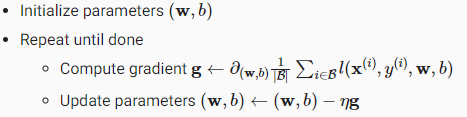



In [162]:
@d2l.add_to_class(d2l.Trainer)  #@save
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)  #@save
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model) 
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

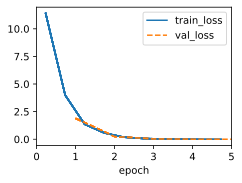

In [163]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

In [164]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

data.w, data.b, model.w.reshape(data.w.shape), model.b

error in estimating w: tensor([ 0.0089, -0.0162])
error in estimating b: tensor([0.0276])


(tensor([ 2.0000, -3.4000]),
 4.2,
 tensor([ 1.9911, -3.3838], grad_fn=<ViewBackward0>),
 tensor([4.1724], requires_grad=True))

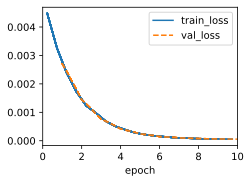

In [165]:
# With w=[0, 0] and b=0.1

model = LinearRegressionScratch(2, lr=0.01)
data = d2l.SyntheticRegressionData(w=torch.tensor([0., 0.]), b=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [166]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([7.5845e-05, 2.0353e-04])
error in estimating b: tensor([0.0036])
